In [2]:
#import survey
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
class survey:
    def __init__(self,pandas_table):
        try:
            self.z_photo =      np.array(pandas_table["zb"])
        except:
            pass
        try:
            self.ra =           np.array(pandas_table["ra"])
        except:
            pass
        try:
            self.dec =          np.array(pandas_table["dec"])
        except:
            pass
        try:
            self.n_bands =      np.array(pandas_table["n_bands"])
        except:
            pass
        try:
            self.mag_i =         np.array(pandas_table["mag_i"])
        except:
            pass
        try:
            self.NbFilt =       np.array(pandas_table["NbFilt"])
        except:
            pass
        try:
            self.z_spec =       np.array(pandas_table["zspec"])
        except:
            pass
        try:
            self.Imag =         np.array(pandas_table["Imag"])
        except:
            pass
        try:
            self.Rmag =         np.array(pandas_table["Rmag"])
        except:
            pass
        try:
            self.i_auto =       np.array(pandas_table["I_auto"])
        except:
            pass
        try:
            self.delta_z =     (self.z_photo-self.z_spec)/(1.+self.z_spec)
        except:
            pass

    def get_cut(self,i_mag_cut=22.5):
        return np.where(self.i_auto<=i_mag_cut)


    def plot_RADEC(self,i_mag_cut=25.,namefig="fig.png"):
        sel = self.get_cut(i_mag_cut)
        plt.figure(figsize=(10,7))
        try:
            plt.scatter(self.ra[sel],self.dec[sel],c=self.n_bands[sel],cmap = 'brg', marker = '.', edgecolors = 'none', s = 7, vmin = 20, vmax = 40)
        except:
            plt.scatter(self.ra[sel],self.dec[sel],c=self.NbFilt[sel],cmap = 'brg', marker = '.', edgecolors = 'none', s = 7, vmin = 20, vmax = 40)

        plt.xlabel('ra')
        plt.ylabel('dec')
        plt.colorbar(label='# filters')
        plt.savefig("../plots/"+namefig)
        plt.show()

    def histo_filters(self):
        #try:
        plt.hist(self.n_bands,bins=10)
        #except:
        #    plt.hist(self.NbFilter,bins=20)
        plt.xlabel("# filters")
        plt.ylabel("counts")
        plt.show()


    def plot_photoz_vs_z(self,i_mag_cut=22.5,namefig="fig.png"):
        plt.figure(figsize=(10,7))
        sel = self.get_cut(i_mag_cut)
        try:
            plt.scatter(self.z_photo[sel], self.i_auto[sel], c = self.n_bands[sel], cmap = 'brg', marker = '.', edgecolors = 'none', s = 3, vmin = 0, vmax = 40)
            plt.ylabel('I-auto')
        except:
            plt.scatter(self.z_photo[sel], self.mag_i[sel], c = self.n_bands[sel], cmap = 'brg', marker = '.', edgecolors = 'none', s = 3, vmin = 0, vmax = 40)
            plt.ylabel('I-mag')
        plt.colorbar(label = '# Filters')
        plt.xlabel('Photo-z')
        plt.axis([0,1.2,17,23])
        plt.savefig("../plots/"+namefig)
        plt.show()


In [4]:
PAUS_COSMOS = pd.read_csv("../data/PAUS_COSMOS.csv",sep=",",comment="#") # read from csv file
PURE_COSMOS = pd.read_csv("../data/PURE_COSMOS.csv",sep=",",comment="#") # read from csv file

In [5]:
PC = survey(PAUS_COSMOS)
C = survey(PURE_COSMOS)

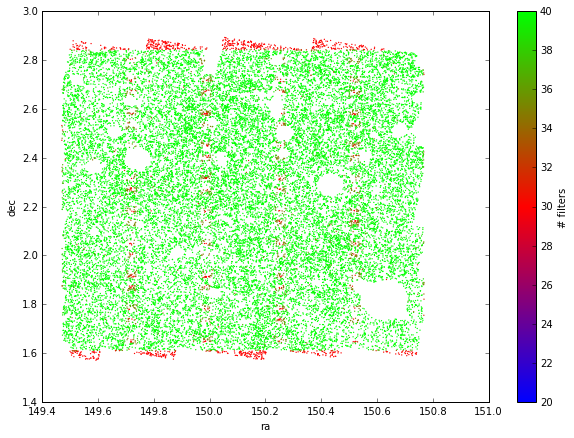

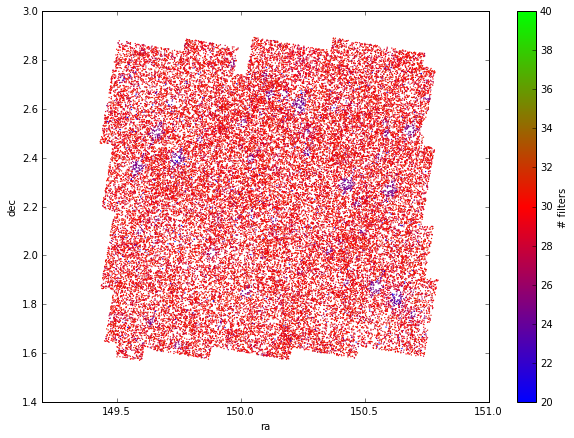

In [7]:
PC.plot_RADEC(i_mag_cut=22.5,namefig="PAUS_cut22-5.png")
C.plot_RADEC(i_mag_cut=22.5,namefig="cosmos_cut22-5.png")

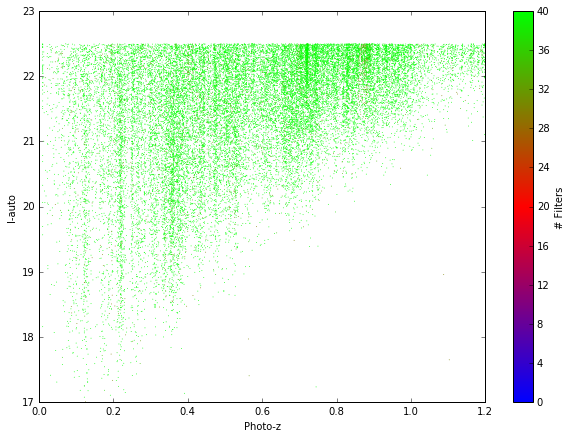

In [55]:
PC.plot_photoz_vs_z(i_mag_cut=22.5,namefig="PAUS_I_auto_z_cut22-5.png")